import libraries

In [94]:
import pandas as pd

In [95]:
#import the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
!pip install folium
import folium
from folium import plugins

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [96]:
#default plot size
plt.rcParams['figure.figsize']=10,12

In [97]:
#this will disable the warnings
import warnings 
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/Covid cases in Ghana.xlsx')
df_india=df.copy()
df

ID        DATE         REGION  CONFIRMED DEATHS RECOVERED  \
0        1  12/03/2020        Ashanti          0      0         0   
1        2  12/03/2020    Brong Ahafo          0      0         0   
2        3  12/03/2020        Central          0      0         0   
3        4  12/03/2020     Upper East          0      0         0   
4        5  12/03/2020  Greater Accra          2      0         0   
...    ...         ...            ...        ...    ...       ...   
3616  3617  10/10/2020  Western North          0      0         0   
3617  3618  10/10/2020       Savannah          0      0         0   
3618  3619  10/10/2020           Bono          0      0         0   
3619  3620  10/10/2020      Bono East          0      0         0   
3620  3621  10/10/2020   Non spécifié          0      2        17   

                                      LIEN SOURCE  
0     https://www.ghanahealthservice.org/covid19/  
1     https://www.ghanahealthservice.org/covid19/  
2     https://www.ghanahealthservice.org/covid19/  
3     https://www.ghanahealthservice.org/covid19/  
4     https://www.ghanahealthservice.org/covid19/  
...                                           ...  
3616  https://www.ghanahealthservice.org/covid19/  
3617  https://www.ghanahealthservice.org/covid19/  
3618  https://www.ghanahealthservice.org/covid19/  
3619  https://www.ghanahealthservice.org/covid19/  
3620  https://www.ghanahealthservice.org/covid19/  

[3621 rows x 7 columns]

In [99]:
#Coordinates of cities in Ghana

In [100]:
Ghana_coord = pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/Ghana Coordinates.xlsx')

In [101]:
#Data for Korea, Italy, Wuhan and Ghana(day by day)
#Daily progression of the cases in these countries
dbd_Ghana = pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/perdaycasesghana.xlsx',parse_dates=True, sheet_name='Ghana')
dbd_Italy = pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/perdaycasesghana.xlsx',parse_dates=True, sheet_name='Italy')
dbd_Korea = pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/perdaycasesghana.xlsx',parse_dates=True, sheet_name='Korea')
dbd_Wuhan = pd.read_excel('/Users/benedictadadson/Desktop/COVID Ghana/perdaycasesghana.xlsx',parse_dates=True, sheet_name='Wuhan')

In [102]:
#df.drop(['ID'],axis=1,inplace=True)
df['Total Cases'] = df['CONFIRMED']
total_cases = df['Total Cases'].sum()
print('Total number of confirmed COVID 2019 cases across Ghana till October 10, 2020:', total_cases)

Total number of confirmed COVID 2019 cases across Ghana till October 10, 2020: 47564


In [103]:
#Total number of confirmed cases - 47,564

In [104]:
#Higlight dataframe using a gradient background
#Darker the red the more number of cases
df.style.background_gradient(cmap='Reds')

In [105]:
#Number of active cases in regions

In [108]:
#Visualizing spread geographically
#df_full = pd.merge(Ghana_coord,df,on='REGION')
#data = df_full[['REGION','Total Cases','RECOVERED','DEATHS']]
#data.sort_values('Total Cases',ascending=False, inplace=True)
#sns.set_color_codes("pastel")
#sns.barplot(x="Total Cases", y="REGION", data=data,label="Total", color="r")

In [111]:
#How the cases are rising
import plotly
plotly.io.renderers.default = 'colab'

In [126]:
#Rise of COVID cases in Ghana
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_Ghana['Date'], y = dbd_Ghana['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Ghana (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

import plotly.express as px
fig = px.bar(dbd_Ghana, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Ghana on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [129]:
df = pd.read_csv('/Users/benedictadadson/Desktop/COVID Ghana/WorldCleanData.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_confirmed = pd.read_csv("/Users/benedictadadson/Desktop/COVID Ghana/time_series_covid19_confirmed_global copy.csv")
df_recovered = pd.read_csv("/Users/benedictadadson/Desktop/COVID Ghana/time_series_covid19_deaths_global copy.csv")
df_deaths = pd.read_csv("/Users/benedictadadson/Desktop/COVID Ghana/time_series_covid19_recovered_global copy.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.head()

Province/State    Country      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN   Thailand  15.0000  101.0000        0        0        0   
1            NaN      Japan  36.0000  138.0000        0        0        0   
2            NaN  Singapore   1.2833  103.8333        0        0        0   
3            NaN      Nepal  28.1667   84.2500        0        0        0   
4            NaN   Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        0        2        2  ...       35       35       35       41   
1        0        1        1  ...      118      118      144      144   
2        0        0        0  ...      105      105      109      114   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...       35       42       42       49   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0       42       42       42       42       44     44.0  
1      144      150      191      232      235    235.0  
2      114      114      124      140      144    144.0  
3        1        1        1        1        1      1.0  
4       60       75       87      114      139    139.0  

[5 rows x 66 columns]

In [130]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

Date    Country                Province/State  Confirmed  Deaths  \
0 2020-01-22  Australia  Australian Capital Territory        0.0     0.0   
1 2020-01-22  Australia         From Diamond Princess        0.0     0.0   
2 2020-01-22  Australia               New South Wales        0.0     0.0   
3 2020-01-22  Australia            Northern Territory        0.0     0.0   
4 2020-01-22  Australia                    Queensland        0.0     0.0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [131]:
df.groupby('Date').sum().head()

Lat       Long  Confirmed  Deaths  Recovered
Date                                                          
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0

In [132]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [133]:
#fig = go.Figure()
#Plotting datewise confirmed cases
#fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
#fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
#fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
#fig.show()

In [141]:
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [142]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

ds         y
57 2020-03-19  242708.0
58 2020-03-20  272166.0
59 2020-03-21  304524.0
60 2020-03-22  335955.0
61 2020-03-23  336004.0

In [144]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=7) 
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [145]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355140.116391  334535.387807  375800.038636
65 2020-03-27  372238.437942  350814.387802  393300.401788
66 2020-03-28  388677.728631  368672.457492  408784.230568
67 2020-03-29  405310.574870  383447.670461  428621.187554
68 2020-03-30  418532.558629  397242.802185  442850.215554

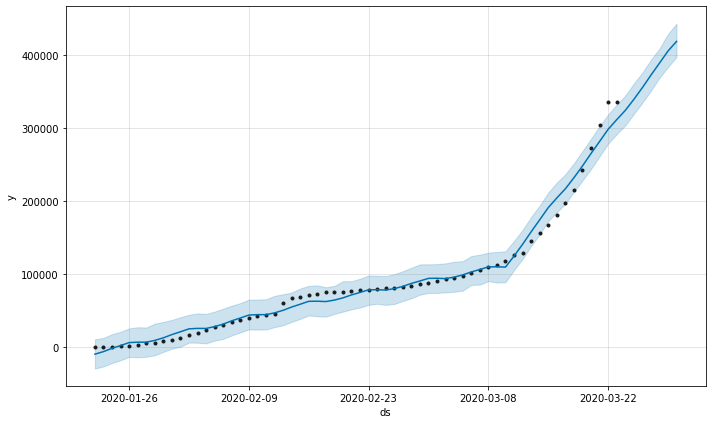

In [146]:
confirmed_forecast_plot = m.plot(forecast)

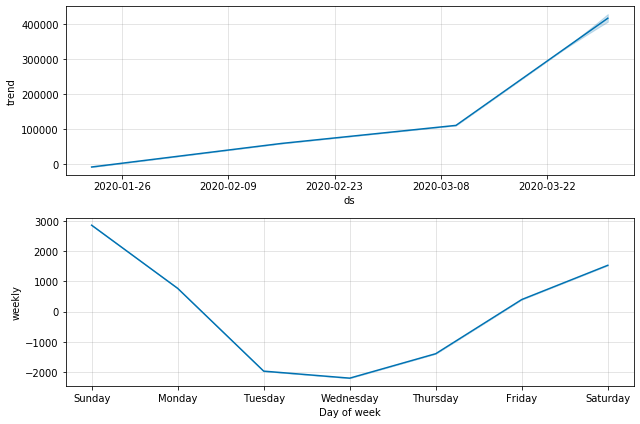

In [147]:
confirmed_forecast_plot =m.plot_components(forecast)

In [148]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [149]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2020-03-26  15411.877522  14521.004083  16402.188192
65 2020-03-27  16199.617603  15255.424303  17160.361299
66 2020-03-28  17006.904589  16006.326992  17926.481182
67 2020-03-29  17831.505383  16777.927116  18897.097923
68 2020-03-30  18490.986176  17433.209682  19527.024622

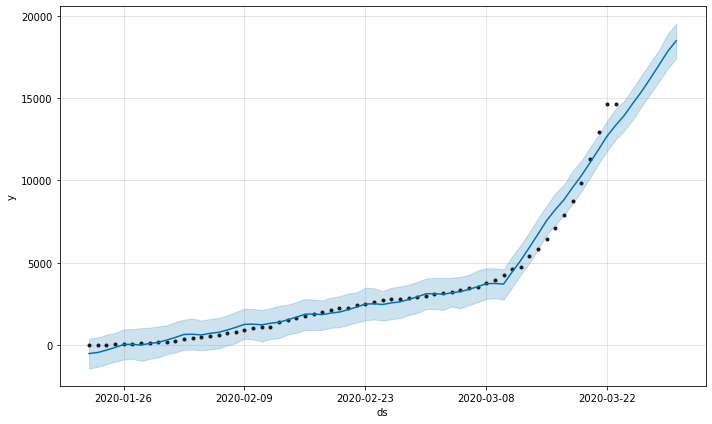

In [150]:
deaths_forecast_plot = m.plot(forecast)

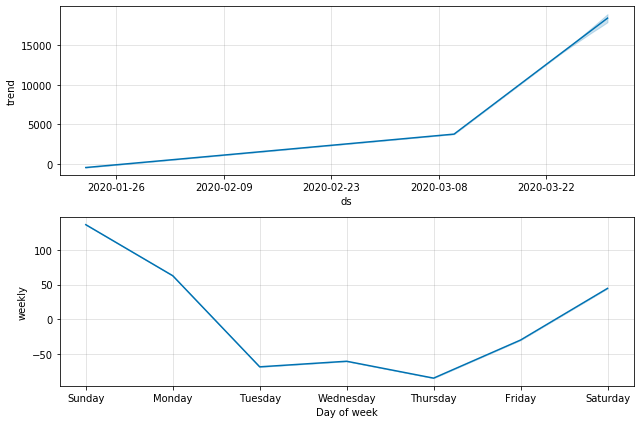

In [151]:
deaths_forecast_plot = m.plot_components(forecast)

In [152]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

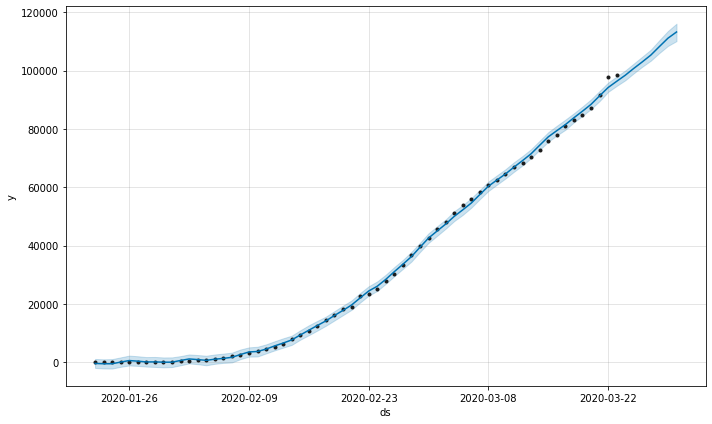

In [153]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
 
recovered_forecast_plot = m.plot(forecast)


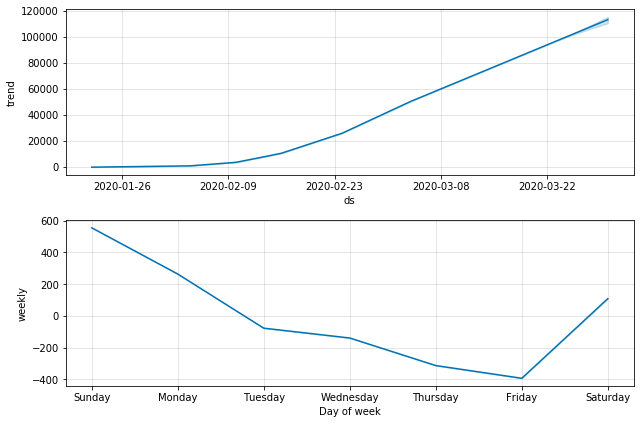

In [154]:
recovered_forecast_plot = m.plot_components(forecast)